In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Dataset-20240827T051357Z-001/Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# let's Begin with Deep learning (ANN)
fully connected neurone
-sequectial
-non_sequestial

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#

In [ ]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11)) #input layer
model.add(Dense(1,activation='sigmoid')) #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Ensure that x_train and y_train are NumPy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Fit the model with a validation split
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7825 - loss: 0.5549 - val_accuracy: 0.7987 - val_loss: 0.4939
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7948 - loss: 0.4917 - val_accuracy: 0.7987 - val_loss: 0.4646
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7926 - loss: 0.4691 - val_accuracy: 0.7987 - val_loss: 0.4499
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.4608 - val_accuracy: 0.7994 - val_loss: 0.4406
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - loss: 0.4625 - val_accuracy: 0.8000 - val_loss: 0.4344


In [ ]:
model.layers[0].get_weights()

[array([[-0.03360873, -0.35725734, -0.08192559],
        [-1.0316812 ,  0.8197259 , -0.42173094],
        [ 0.04435223,  0.18366608,  0.25204605],
        [-0.3590287 ,  0.17456996,  0.07757305],
        [ 0.2661681 , -0.11937523, -0.17860828],
        [-0.19633205,  0.03735908,  0.26256102],
        [ 0.5318163 , -0.7399036 ,  0.2735376 ],
        [-0.39104977,  0.4269751 ,  0.70178586],
        [-0.56609744,  0.013953  , -0.16438521],
        [ 0.14311145, -0.02184382, -0.28434935],
        [ 0.3608497 , -0.62596744, -0.20318307]], dtype=float32),
 array([ 0.36336297, -0.3162775 ,  0.33761588], dtype=float32)]

In [ ]:
model.layers[1].get_weights()
#

[array([[-1.5351658 ],
        [ 0.66542584],
        [-0.9705836 ]], dtype=float32),
 array([-0.3099637], dtype=float32)]

In [ ]:
model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.21129577],
       [0.11876248],
       [0.27298164],
       ...,
       [0.31275427],
       [0.1177246 ],
       [0.20910388]], dtype=float32)

In [ ]:
y_log=model.predict(x_test)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

# ###

In [ ]:
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11)) #input layer
model.add(Dense(11,activation='sigmoid')) #hidden layer
model.add(Dense(1,activation='sigmoid')) #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# Ensure that x_train and y_train are NumPy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Fit the model with a validation split
history = model.fit(x_train, y_train,batch_size=25, epochs=50,verbose=1, validation_split=0.2)

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6166 - loss: 0.6276 - val_accuracy: 0.7987 - val_loss: 0.4867
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4865 - val_accuracy: 0.7987 - val_loss: 0.4675
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.4749 - val_accuracy: 0.7987 - val_loss: 0.4484
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.4569 - val_accuracy: 0.8031 - val_loss: 0.4330
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.4339 - val_accuracy: 0.8225 - val_loss: 0.4247
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.4425 - val_accuracy: 0.8238 - val_loss: 0.4209
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8043 - loss: 0.4395 - val_accuracy: 0.8225 - val_loss: 0.4181
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4317 - val_accuracy: 0.

In [ ]:
y_log=model.predict(x_test)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
history.history

{'accuracy': [0.7420312762260437,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.8023437261581421,
  0.8103125095367432,
  0.8121874928474426,
  0.8125,
  0.8131250143051147,
  0.8174999952316284,
  0.8201562762260437,
  0.821093738079071,
  0.8232812285423279,
  0.8290625214576721,
  0.8303124904632568,
  0.8345312476158142,
  0.8345312476158142,
  0.8378124833106995,
  0.8381249904632568,
  0.8393750190734863,
  0.8423437476158142,
  0.8426562547683716,
  0.8454687595367432,
  0.8467187285423279,
  0.8487499952316284,
  0.8493750095367432,
  0.8501562476158142,
  0.8515625,
  0.8532812595367432,
  0.8543750047683716,
  0.8553125262260437,
  0.8557812571525574,
  0.8571875095367432,
  0.8581249713897705,
  0.8567187786102295,
  0.8581249713897705,
  0.8571875095367432,
  0.8584374785423279,
  0.8603125214576721,
  0.8604687452316284,
  0.860156238079071,
  0.8615624904632568,
  0.8604687452316284,
  0.8604687452316284,
  0.8600000143051147,
  0.8615624904632568,

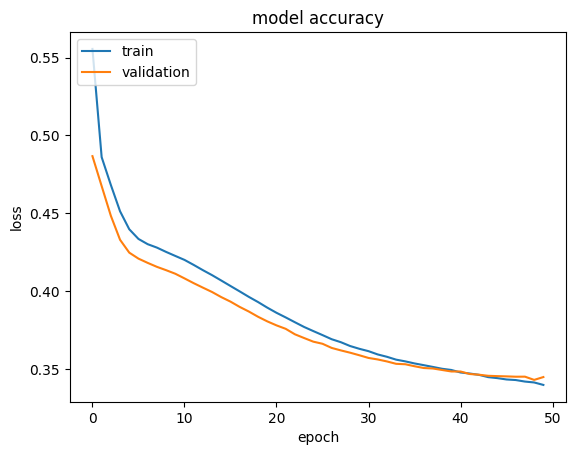

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

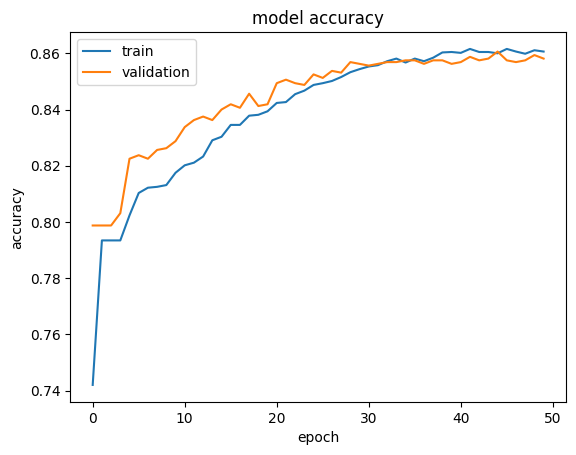

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# task =
# take train dataset-
# 1. do necessary preprocessing and
# 2. apply Ann and use 4 hidden layers, In the first and last layer we contain 5 neurons in the middle containing 3 neurons with 2 output
# now generate (accuracy and  validation_accuracy and loss,validation_loss) graph.

In [ ]:
import pandas as pd


file_path = '/content/drive/MyDrive/Dataset/EDA/train.csv'
data = pd.read_csv(file_path)

data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

In [ ]:
from sklearn.preprocessing import StandardScaler


data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


X = data.drop(columns=['Survived'])
y = data['Survived']


X.head(), y.head()


<ipython-input-37-01b4902c670c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-37-01b4902c670c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

(   Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
 0       3 -0.565736      1      0 -0.502445      True       False        True
 1       1  0.663861      1      0  0.786845     False       False       False
 2       3 -0.258337      0      0 -0.488854     False       False        True
 3       1  0.433312      1      0  0.420730     False       False        True
 4       3  0.433312      0      0 -0.486337      True       False        True,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(5, activation='relu', input_dim=X_train.shape[1]),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

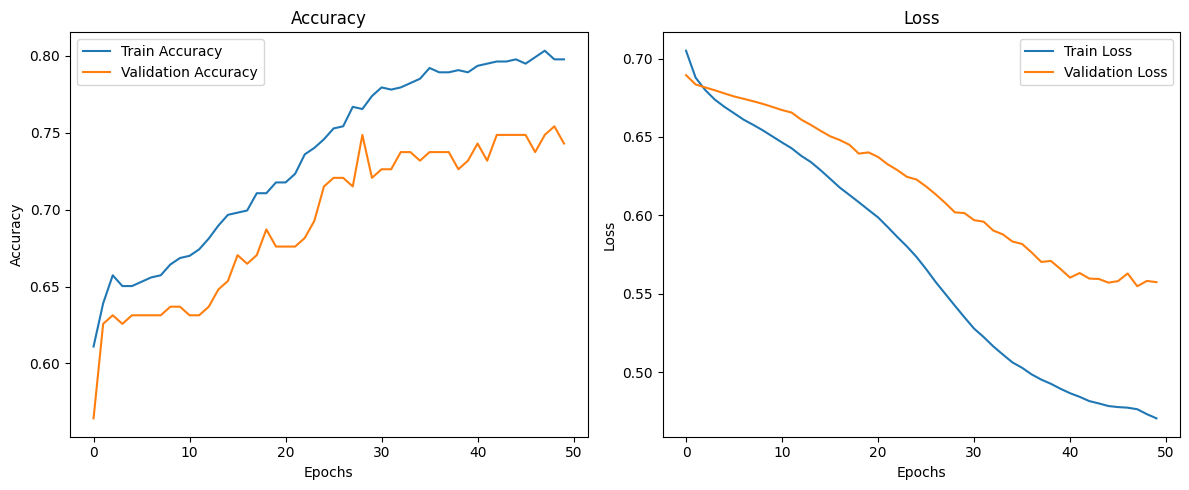

In [ ]:
history_dict = history.history


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history_dict['accuracy'], label='Train Accuracy')
axes[0].plot(history_dict['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()


axes[1].plot(history_dict['loss'], label='Train Loss')
axes[1].plot(history_dict['val_loss'], label='Validation Loss')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()